<a href="https://www.kaggle.com/code/vtrackstar/machine-learning-predicting-nba-victories?scriptVersionId=208917059" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Ask
* The primary objective of this project is to develop a predictive model for NBA team performance, specifically focusing on win percentage for the 2024 season based on 2023 statistics. Key questions driving the project include:
   * What statistical features most strongly correlate with team success (win percentage)?
   * Can historical season data accurately predict team performance for the current season?
   * Which modeling approaches best capture the relationship between team metrics and win percentage?
* To address these questions, we utilized metrics such as points per game (PTS), assists (AST), and defensive rating (DRtg) to train and validate regression models, laying the foundation for further refinement and predictive analysis.

## Prepare

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/teamadv/NBA Team Stats Thru 11_20 - 2425teamadv.csv
/kaggle/input/teamadv/NBA Team Stats Thru 11_20 - 2324teamadv.csv
/kaggle/input/nbateamstatsupto112024/NBA Team Stats Thru 11_20 - 2425nbateam.csv
/kaggle/input/nbateamstatsupto112024/NBA Team Stats Thru 11_20 - 2324nbateam.csv


In [2]:
lyr = pd.read_csv('/kaggle/input/nbateamstatsupto112024/NBA Team Stats Thru 11_20 - 2324nbateam.csv')
tyr = pd.read_csv('/kaggle/input/nbateamstatsupto112024/NBA Team Stats Thru 11_20 - 2425nbateam.csv')
lyradv = pd.read_csv('/kaggle/input/teamadv/NBA Team Stats Thru 11_20 - 2324teamadv.csv')
tyradv = pd.read_csv('/kaggle/input/teamadv/NBA Team Stats Thru 11_20 - 2425teamadv.csv')

In [3]:
lyr

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Indiana Pacers*,82,240.3,47.0,92.7,0.507,13.2,35.3,0.374,...,0.782,10.1,31.4,41.5,30.8,7.7,5.9,12.9,21.4,123.3
1,2,Boston Celtics*,82,241.8,43.9,90.2,0.487,16.5,42.5,0.388,...,0.807,10.7,35.6,46.3,26.9,6.8,6.6,11.9,16.2,120.6
2,3,Oklahoma City Thunder*,82,241.5,44.5,89.3,0.499,13.3,34.2,0.389,...,0.825,8.8,33.2,42.0,27.1,8.5,6.6,12.7,18.8,120.1
3,4,Milwaukee Bucks*,82,241.5,43.1,88.5,0.487,14.2,38.1,0.373,...,0.774,9.4,34.8,44.2,26.5,6.8,5.0,12.9,19.2,119.0
4,5,Atlanta Hawks,82,242.1,43.0,92.5,0.465,13.7,37.7,0.364,...,0.797,12.5,32.2,44.7,26.6,7.5,4.5,13.5,18.6,118.3
5,6,Los Angeles Lakers*,82,242.1,43.7,87.5,0.499,11.8,31.4,0.377,...,0.782,8.2,34.9,43.1,28.5,7.4,5.5,14.0,15.6,118.0
6,7,Dallas Mavericks*,82,240.3,43.1,89.7,0.481,14.6,39.5,0.369,...,0.758,9.7,33.2,42.9,25.7,6.9,5.0,12.5,18.3,117.9
7,8,Golden State Warriors,82,241.8,43.7,91.6,0.477,14.8,38.9,0.380,...,0.780,12.1,34.6,46.7,29.3,7.0,4.6,14.3,19.5,117.8
8,9,Sacramento Kings,82,242.1,43.3,90.9,0.477,14.4,39.3,0.366,...,0.745,10.8,33.2,44.0,28.3,7.6,4.2,13.1,19.9,116.6
9,10,Phoenix Suns*,82,241.2,42.5,86.1,0.493,12.4,32.6,0.382,...,0.808,10.1,33.9,44.1,27.0,7.4,6.0,14.9,18.0,116.2


In [4]:
tyr

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Cleveland Cavaliers,17,240.0,46.0,88.1,0.522,15.4,36.9,0.416,...,0.793,8.7,33.9,42.6,28.5,9.1,5.2,13.1,18.0,123.5
1,2,Boston Celtics,15,245.0,41.9,90.5,0.463,19.1,50.5,0.379,...,0.819,10.3,32.5,42.7,25.9,7.1,4.9,12.1,16.5,121.5
2,3,Golden State Warriors,14,241.8,43.9,92.9,0.472,16.1,41.7,0.387,...,0.695,13.3,35.8,49.1,30.5,10.0,5.7,14.7,21.7,119.6
3,4,Memphis Grizzlies,16,240.0,43.6,91.6,0.476,12.3,36.1,0.341,...,0.775,12.3,35.4,47.7,29.3,8.3,7.4,17.2,21.3,118.9
4,5,New York Knicks,15,240.0,44.2,87.5,0.505,14.1,35.6,0.395,...,0.820,9.5,32.8,42.3,27.7,6.8,3.5,12.4,17.3,118.3
5,6,Los Angeles Lakers,14,240.0,41.6,86.3,0.483,12.6,33.6,0.374,...,0.792,9.3,31.1,40.4,27.4,7.6,4.4,12.8,16.5,117.3
6,7,Sacramento Kings,15,245.0,43.1,88.1,0.489,11.9,35.1,0.340,...,0.827,9.0,34.3,43.3,24.6,8.3,4.7,13.9,20.4,116.9
7,8,Denver Nuggets,13,243.8,42.3,90.3,0.468,12.3,32.4,0.380,...,0.773,12.1,34.1,46.2,29.6,9.2,4.8,14.2,19.1,116.5
8,9,Dallas Mavericks,15,240.0,43.2,89.7,0.481,12.2,35.1,0.347,...,0.775,11.5,32.9,44.4,25.1,7.9,5.1,13.0,20.8,115.6
9,10,Chicago Bulls,16,240.0,41.6,90.6,0.459,16.1,42.6,0.377,...,0.784,9.5,35.6,45.1,28.2,7.1,4.2,16.0,18.1,115.4


In [5]:
lyradv

,Rk,Team,Conf,Div,W,L,W/L%,MOV,ORtg,DRtg,NRtg
0,1,Boston Celtics,E,A,64,18,0.780,11.34,124.23,112.51,11.71
1,2,Oklahoma City Thunder,W,NW,57,25,0.695,7.41,120.43,113.12,7.31
2,3,Minnesota Timberwolves,W,NW,56,26,0.683,6.45,116.63,109.98,6.65
3,4,Denver Nuggets,W,NW,57,25,0.695,5.26,119.49,114.05,5.44
4,5,New York Knicks,E,A,50,32,0.610,4.59,119.11,114.22,4.89
5,6,New Orleans Pelicans,W,SW,49,33,0.598,4.41,118.31,113.70,4.61
6,7,Los Angeles Clippers,W,P,51,31,0.622,3.28,119.75,116.51,3.24
7,8,Phoenix Suns,W,P,49,33,0.598,3.06,118.78,115.69,3.09
8,9,Golden State Warriors,W,P,46,36,0.561,2.61,118.67,115.95,2.72
9,10,Indiana Pacers,E,C,47,35,0.573,3.05,121.85,118.85,2.99


In [6]:
tyradv

,Rk,Team,Conf,Div,W,L,W/L%,MOV,ORtg,DRtg,NRtg
0,1,Oklahoma City Thunder,W,NW,12,4,0.750,10.63,113.77,103.22,10.55
1,2,Golden State Warriors,W,P,11,3,0.786,10.50,116.90,106.64,10.25
2,3,Cleveland Cavaliers,E,C,16,1,0.941,12.29,123.74,111.58,12.16
3,4,Houston Rockets,W,SW,11,5,0.688,8.44,113.39,105.37,8.02
4,5,Boston Celtics,E,A,12,3,0.800,9.73,122.66,112.76,9.90
5,6,Dallas Mavericks,W,SW,8,7,0.533,6.33,117.92,111.68,6.24
6,7,New York Knicks,E,A,9,6,0.600,6.40,123.09,116.52,6.57
7,8,Memphis Grizzlies,W,SW,9,7,0.563,6.38,114.42,108.30,6.12
8,9,Los Angeles Clippers,W,P,9,7,0.563,0.75,111.18,110.13,1.05
9,10,Orlando Magic,E,SE,9,7,0.563,3.69,108.94,104.86,4.09


In [7]:
print(lyr.columns)
print(tyr.columns)
print(lyradv.columns)
print(tyradv.columns)

Index(['Rk', 'Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')
Index(['Rk', 'Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')
Index(['Rk', 'Team', 'Conf', 'Div', 'W', 'L', 'W/L%', 'MOV', 'ORtg', 'DRtg',
       'NRtg'],
      dtype='object')
Index(['Rk', 'Team', 'Conf', 'Div', 'W', 'L', 'W/L%', 'MOV', 'ORtg', 'DRtg',
       'NRtg'],
      dtype='object')


In [8]:
lastyear = pd.merge(lyr, lyradv, on='Team', how='inner')
thisyear = pd.merge(tyr, tyradv, on='Team', how='inner')

In [9]:
lastyear

,Rk_x,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,Rk_y,Conf,Div,W,L,W/L%,MOV,ORtg,DRtg,NRtg
0,5,Atlanta Hawks,82,242.1,43.0,92.5,0.465,13.7,37.7,0.364,...,21,E,SE,36,46,0.439,-2.18,118.16,120.25,-2.09
1,8,Golden State Warriors,82,241.8,43.7,91.6,0.477,14.8,38.9,0.380,...,9,W,P,46,36,0.561,2.61,118.67,115.95,2.72
2,9,Sacramento Kings,82,242.1,43.3,90.9,0.477,14.4,39.3,0.366,...,13,W,P,46,36,0.561,1.74,117.68,116.01,1.67
3,11,Utah Jazz,82,241.5,42.0,89.9,0.467,12.9,36.5,0.354,...,23,W,NW,31,51,0.378,-4.89,116.38,121.39,-5.01
4,16,Houston Rockets,82,242.1,41.8,91.0,0.459,12.7,36.1,0.352,...,17,W,SW,41,41,0.500,1.12,115.34,114.22,1.12
5,17,Washington Wizards,82,240.6,43.0,91.4,0.470,12.4,35.5,0.348,...,29,E,SE,15,67,0.183,-9.29,111.12,120.22,-9.10
6,21,Toronto Raptors,82,241.5,42.3,89.7,0.471,11.5,33.1,0.347,...,25,E,A,25,57,0.305,-6.44,113.14,119.68,-6.54
7,22,Chicago Bulls,82,243.7,42.0,89.5,0.470,11.5,32.1,0.358,...,20,E,C,39,43,0.476,-1.44,115.83,117.46,-1.64
8,23,San Antonio Spurs,82,241.8,41.9,90.7,0.462,12.6,36.4,0.347,...,24,W,SW,22,60,0.268,-6.49,110.85,117.18,-6.32
9,25,Brooklyn Nets,82,241.5,40.7,89.1,0.456,13.3,36.7,0.362,...,22,E,A,32,50,0.390,-2.89,114.14,117.13,-2.99


In [10]:
thisyear

,Rk_x,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,Rk_y,Conf,Div,W,L,W/L%,MOV,ORtg,DRtg,NRtg
0,1,Cleveland Cavaliers,17,240.0,46.0,88.1,0.522,15.4,36.9,0.416,...,3,E,C,16,1,0.941,12.29,123.74,111.58,12.16
1,2,Boston Celtics,15,245.0,41.9,90.5,0.463,19.1,50.5,0.379,...,5,E,A,12,3,0.800,9.73,122.66,112.76,9.90
2,3,Golden State Warriors,14,241.8,43.9,92.9,0.472,16.1,41.7,0.387,...,2,W,P,11,3,0.786,10.50,116.90,106.64,10.25
3,4,Memphis Grizzlies,16,240.0,43.6,91.6,0.476,12.3,36.1,0.341,...,8,W,SW,9,7,0.563,6.38,114.42,108.30,6.12
4,5,New York Knicks,15,240.0,44.2,87.5,0.505,14.1,35.6,0.395,...,7,E,A,9,6,0.600,6.40,123.09,116.52,6.57
5,6,Los Angeles Lakers,14,240.0,41.6,86.3,0.483,12.6,33.6,0.374,...,16,W,P,10,4,0.714,1.29,118.43,116.84,1.60
6,7,Sacramento Kings,15,245.0,43.1,88.1,0.489,11.9,35.1,0.340,...,15,W,P,8,7,0.533,3.13,116.16,112.98,3.18
7,8,Denver Nuggets,13,243.8,42.3,90.3,0.468,12.3,32.4,0.380,...,11,W,NW,8,5,0.615,1.46,114.29,113.20,1.09
8,9,Dallas Mavericks,15,240.0,43.2,89.7,0.481,12.2,35.1,0.347,...,6,W,SW,8,7,0.533,6.33,117.92,111.68,6.24
9,10,Chicago Bulls,16,240.0,41.6,90.6,0.459,16.1,42.6,0.377,...,23,E,C,6,10,0.375,-7.50,111.10,118.03,-6.93


## Process

In [11]:
print(lastyear.isna().sum())
print(thisyear.isna().sum())

Rk_x    0
Team    0
G       0
MP      0
FG      0
FGA     0
FG%     0
3P      0
3PA     0
3P%     0
2P      0
2PA     0
2P%     0
FT      0
FTA     0
FT%     0
ORB     0
DRB     0
TRB     0
AST     0
STL     0
BLK     0
TOV     0
PF      0
PTS     0
Rk_y    0
Conf    0
Div     0
W       0
L       0
W/L%    0
MOV     0
ORtg    0
DRtg    0
NRtg    0
dtype: int64
Rk_x    0
Team    0
G       0
MP      0
FG      0
FGA     0
FG%     0
3P      0
3PA     0
3P%     0
2P      0
2PA     0
2P%     0
FT      0
FTA     0
FT%     0
ORB     0
DRB     0
TRB     0
AST     0
STL     0
BLK     0
TOV     0
PF      0
PTS     0
Rk_y    0
Conf    0
Div     0
W       0
L       0
W/L%    0
MOV     0
ORtg    0
DRtg    0
NRtg    0
dtype: int64


## Analyze and Model

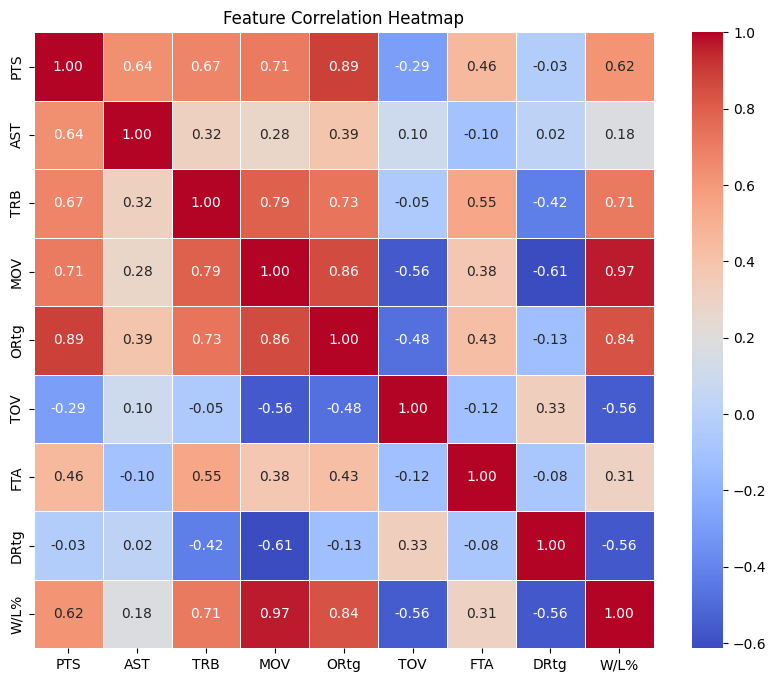

Correlation Matrix:
           PTS       AST       TRB       MOV      ORtg       TOV       FTA  \
PTS   1.000000  0.639792  0.673748  0.709611  0.892119 -0.286437  0.456273   
AST   0.639792  1.000000  0.315047  0.279462  0.391924  0.101477 -0.104094   
TRB   0.673748  0.315047  1.000000  0.792223  0.731318 -0.054197  0.545270   
MOV   0.709611  0.279462  0.792223  1.000000  0.860455 -0.558763  0.378693   
ORtg  0.892119  0.391924  0.731318  0.860455  1.000000 -0.479702  0.428165   
TOV  -0.286437  0.101477 -0.054197 -0.558763 -0.479702  1.000000 -0.119420   
FTA   0.456273 -0.104094  0.545270  0.378693  0.428165 -0.119420  1.000000   
DRtg -0.027801  0.022518 -0.422905 -0.613205 -0.126684  0.329855 -0.083729   
W/L%  0.620809  0.176527  0.712248  0.966047  0.839929 -0.555261  0.311818   

          DRtg      W/L%  
PTS  -0.027801  0.620809  
AST   0.022518  0.176527  
TRB  -0.422905  0.712248  
MOV  -0.613205  0.966047  
ORtg -0.126684  0.839929  
TOV   0.329855 -0.555261  
FTA  -0.08

In [12]:
## Feature Engineering
response = 'W/L%'
features = ['PTS', 'AST', 'TRB', 'MOV', 'ORtg', 'TOV', 'FTA', 'DRtg']
corrfeatures = ['PTS', 'AST', 'TRB', 'MOV', 'ORtg', 'TOV', 'FTA', 'DRtg', 'W/L%']
correlation_matrix = lastyear[corrfeatures].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
print("Correlation Matrix:")
print(correlation_matrix)

In [13]:
## Split the Data into Training and Testing Sets
x_train = lastyear[features]
x_test = thisyear[features]
y_train = lastyear[response]
y_test = thisyear[response]

In [14]:
## Linear Regression
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Validation MSE: {mse}")
print(f"Validation R2 Score: {r2}")

Validation MSE: 0.016433275817879952
Validation R2 Score: 0.5612024259778104


In [15]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 0.00820098 -0.00281276 -0.00980979  0.27411301 -0.24386107  0.01436775
 -0.00371029  0.23988119]
Intercept: 0.4135959853071332


## Share

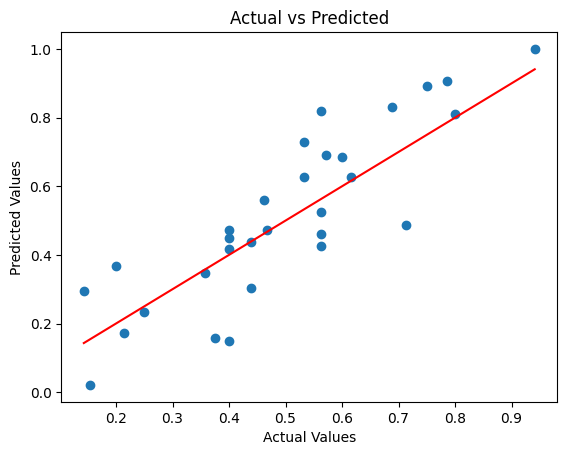

In [16]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

## Final Insights
* The linear regression model's performance shows a R² score of **0.561**, meaning it explains 56.1% of the variance in win percentage based on the selected features. This is a reasonable starting point, suggesting that the chosen variables—points scored (PTS), assists (AST), total rebounds (TRB), margin of victory (MOV), offensive rating (ORtg), turnovers (TOV), free throw attempts (FTA), and defensive rating (DRtg)—have a moderate correlation with team performance.
   * The coefficients indicate the contribution of each feature to the predicted win percentage. For instance, the coefficient for MOV **(0.27)** has the strongest positive influence on the win percentage, while DRtg **(-0.24)** has a notable negative effect, suggesting that teams with better defensive ratings tend to have higher win percentages. The intercept of **0.41** represents the baseline win percentage when all other factors are zero.
* While this model provides meaningful insights, there is room for improvement, and the model could likely benefit from additional features or more advanced techniques (like Gradient Boosting or regularization) to boost predictive accuracy and bring the R² closer to 75%, which is often considered a strong result.






